In [6]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1755731931757.jpg,0.261778,0.871825,0.409799,0.076704,0.808782
1,Dataset/1755731846217.jpg,0.691827,0.752664,0.697019,0.072201,0.680483
2,Dataset/1755731960483.jpg,0.326495,0.713761,0.291112,0.067698,0.647031
3,Dataset/1755730149996.jpg,0.286158,0.730341,0.070589,0.122562,0.644876
4,Dataset/1755731845702.jpg,0.917623,0.732925,0.768231,0.108226,0.642313
...,...,...,...,...,...,...
5866,Dataset/1755730573267.jpg,0.714759,0.677937,0.716862,0.675874,0.002947
5867,Dataset/1755881720976.jpg,0.873913,0.561790,0.874379,0.564201,0.002455
5868,Dataset/1757528212909.jpg,0.530825,0.284319,0.532752,0.283823,0.001990
5869,Dataset/1755777782820.jpg,0.854830,0.169269,0.853207,0.168958,0.001652


In [7]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

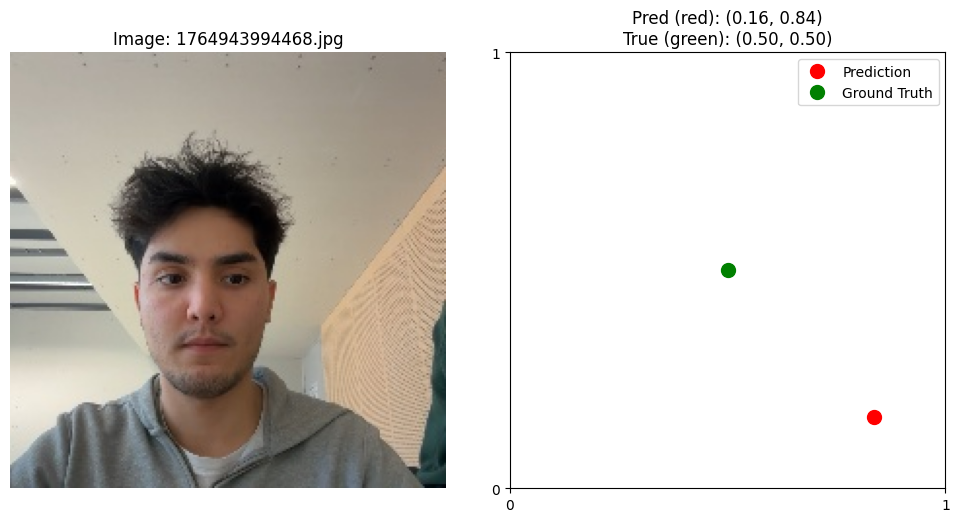

In [8]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [9]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1755731931757.jpg', 'Dataset/1755730143359.jpg', 'Dataset/1764943945663.jpg', 'Dataset/1755730148730.jpg', 'Dataset/1764944045770.jpg', 'Dataset/1755731925338.jpg', 'Dataset/1764944011381.jpg', 'Dataset/1764943962176.jpg', 'Dataset/1755730139254.jpg', 'Dataset/1764943961917.jpg', 'Dataset/1764943964722.jpg', 'Dataset/1764943995491.jpg', 'Dataset/1755730150775.jpg', 'Dataset/1764943995745.jpg', 'Dataset/1755777761366.jpg', 'Dataset/1764944011635.jpg', 'Dataset/1764943996003.jpg', 'Dataset/1764943995230.jpg', 'Dataset/1755898083546.jpg', 'Dataset/1764944012151.jpg', 'Dataset/1764943947211.jpg', 'Dataset/1764944030397.jpg', 'Dataset/1764943997806.jpg', 'Dataset/1764943978818.jpg', 'Dataset/1764943996259.jpg', 'Dataset/1764943997036.jpg', 'Dataset/1764944012411.jpg', 'Dataset/1764943961148.jpg', 'Dataset/1764943996519.jpg', 'Dataset/1764943979074.jpg', 'Dataset/1764944030656.jpg', 'Dataset/1764943962426.jpg', 'Dataset/1764944030137.jpg', 'Dataset/1764943996777.jp

In [10]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 5871
Length of filtered_dataset_df 5803
